In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Analisi del modello: performances con diversi iperparamtri, 50 epoche

Validation losses

In [3]:
graph_model_001_32_12_1 = pd.read_csv('./models_data/graph_model_[0.001,32,12,1]/version_0/metrics.csv')
graph_model_001_64_24_1 = pd.read_csv('./models_data/graph_model_[0.001,64,24,1]/version_5/metrics.csv')
graph_model_003_32_24_1 = pd.read_csv('./models_data/graph_model_[0.003,32,24,1]/version_3/metrics.csv')

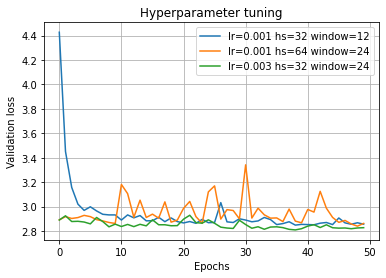

In [4]:
def createplot(X, Y, label):
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(X, Y, label=label)
    plt.legend() 
    

def define_data(df, val=True):
    #extract validation losses
    if val:
        Y = df['val_loss']
    else:
        Y = df['train_loss']
    X = list(set(list(graph_model_001_32_12_1['epoch'])))[:50] #[10:50]
    Y = list(Y)
    Y = [y for y in Y if str(y) != 'nan'][:50] #[10:50]

    return X, Y

title = "Hyperparameter tuning"
xlabel = "Epochs"
ylabel = "Validation loss"


X, Y = define_data(graph_model_001_32_12_1)
createplot(X, Y, 'lr=0.001 hs=32 window=12')

X, Y = define_data(graph_model_001_64_24_1)
createplot(X, Y, 'lr=0.001 hs=64 window=24')

X, Y = define_data(graph_model_003_32_24_1)
createplot(X, Y, 'lr=0.003 hs=32 window=24')

In [5]:
X, Y = define_data(graph_model_001_32_12_1)
X
#createplot(X, Y, 'lr=0.001 hs=32 window=12')

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

Training losses

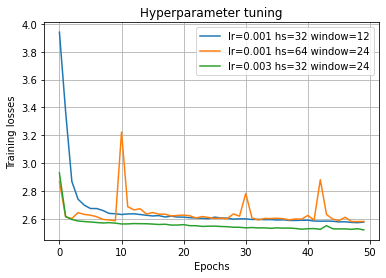

In [6]:
ylabel = 'Training losses'

X, Y = define_data(graph_model_001_32_12_1, False)
createplot(X, Y, 'lr=0.001 hs=32 window=12')

X, Y = define_data(graph_model_001_64_24_1, False)
createplot(X, Y, 'lr=0.001 hs=64 window=24')

X, Y = define_data(graph_model_003_32_24_1, False)
createplot(X, Y, 'lr=0.003 hs=32 window=24')

lr = 0.001 hs = 32 and window = 24 seems to be the stabler one

Now lets confront our model with a baseline graph model

In [7]:
baseline_graph = pd.read_csv('./models_data/baseline_graph/version_1/metrics.csv')

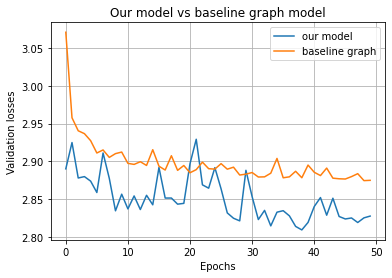

In [8]:
ylabel = 'Validation losses'
title = 'Our model vs baseline graph model'

X, Y = define_data(graph_model_003_32_24_1)
createplot(X, Y, 'our model')

X, Y = define_data(baseline_graph)
createplot(X, Y, 'baseline graph')

Finally: check our model, the baseline graph and a non baseline graph: the LSTM

In [9]:
LSTM_model = pd.read_csv('./models_data/LSTM_model/version_0/metrics.csv')

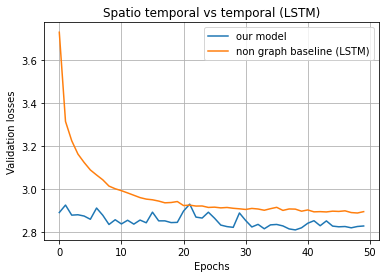

In [11]:
title = 'Spatio temporal vs temporal (LSTM)'

X, Y = define_data(graph_model_003_32_24_1)
createplot(X, Y, 'our model')

X, Y = define_data(LSTM_model)
createplot(X, Y, 'non graph baseline (LSTM)')